# MNIST DATASET (REAL IMPLEMENTATION CODE) #

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from PIL import Image
from numpy import asarray

import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(type(x_train[0,0,0]))


x_train = x_train.astype('float32') / 255.
n=1
# plt.imshow(x_train[n], cmap='Greys', interpolation='nearest') 
# plt.show()

(60000, 28, 28)
<class 'numpy.uint8'>


In [2]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_train.shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)
#input_shape

In [3]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [4]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

# CNN IMPLEMENTATION (CREATE A MODEL) #

In [5]:
```
model = Sequential()  # Sequential 모델 생성
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu',
          input_shape=input_shape))  # 32개의 5x5 필터를 사용하는 Convolutional Layer 추가, 입력 이미지의 shape은 input_shape으로 지정
# 2x2 크기의 Max Pooling Layer 추가
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# 64개의 2x2 필터를 사용하는 Convolutional Layer 추가
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 크기의 Max Pooling Layer 추가
model.add(Dropout(0.25))  # 25%의 노드를 랜덤하게 제거하는 Dropout Layer 추가
model.add(Flatten())  # 다차원 배열을 1차원으로 변환하는 Flatten Layer 추가
# 1000개의 노드를 가지는 Fully Connected Layer 추가
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))  # 50%의 노드를 랜덤하게 제거하는 Dropout Layer 추가
# num_classes개의 노드를 가지는 Fully Connected Layer 추가, Softmax 함수를 사용하여 출력값을 확률값으로 변환
model.add(Dense(num_classes, activation='softmax'))


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [7]:
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# CNN IMPLEMENTATION #

In [9]:
model.summary()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

# CNN IMPLEMENTATION (COMPILE AND TRAIN) #

In [10]:
# batch_size = 128
# epochs = 12
batch_size = 64
epochs = 30
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
hist = model.fit(x_train, y_train,
                batch_size=batch_size, 
                epochs=epochs,
                verbose=1, 
                validation_data=(x_test, y_test)
                )


Epoch 1/30


2023-03-30 21:27:33.138483: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 20s 21ms/step - loss: 0.1597 - accuracy: 0.9502 - val_loss: 7.6198 - val_accuracy: 0.9858
Epoch 2/30
938/938 [==============================] - 20s 21ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 4.0733 - val_accuracy: 0.9895
Epoch 3/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 3.7410 - val_accuracy: 0.9921
Epoch 4/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 3.7793 - val_accuracy: 0.9923
Epoch 5/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 3.7175 - val_accuracy: 0.9923
Epoch 6/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 4.0049 - val_accuracy: 0.9935
Epoch 7/30
938/938 [==============================] - 25s 26ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 6.4785 - val_accuracy: 0.9893
Epo

In [13]:
model.save('./cnn_model.h5')

# CNN IMPLEMENTATION (SHOW ACCURACY GRAPH) #

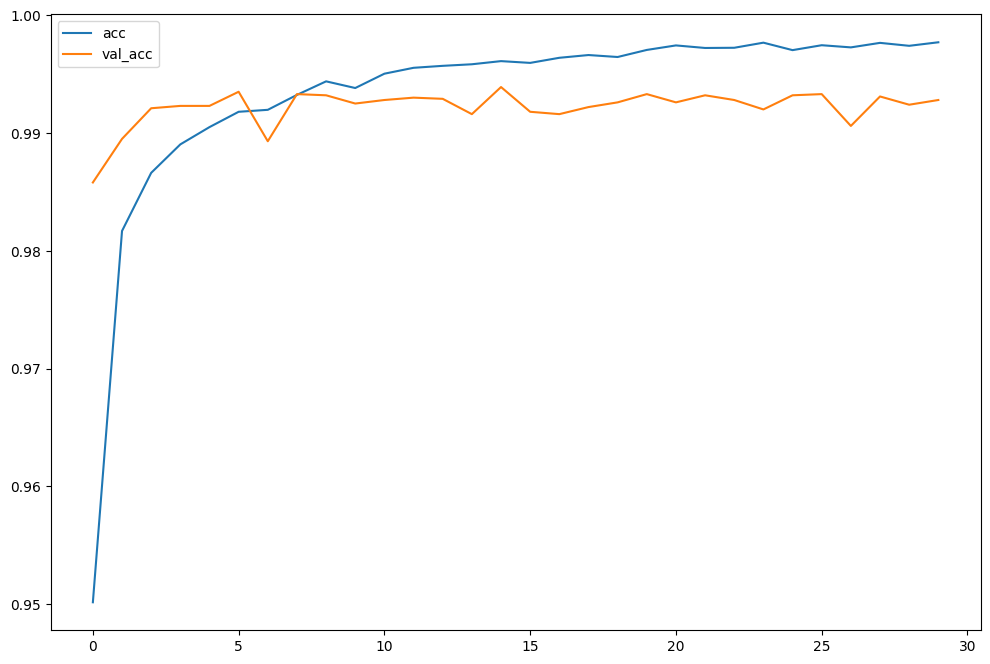

In [15]:
plt.figure(figsize=(12,8))
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


# plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

# CNN IMPLEMENTATION (SHOW WRONG RESULTS) #

In [16]:
# import random
# predicted_result = model.predict(x_test) 
# predicted_labels = np.argmax(predicted_result, axis=1) 
# test_labels = np.argmax(y_test, axis=1)
# wrong_result = []
# for n in range(0, len(test_labels)):
#     if predicted_labels[n] != test_labels[n]: 
#         wrong_result.append(n)
# samples = random.choices(population=wrong_result, k=16) 
# count = 0
# nrows = ncols = 4

# plt.figure(figsize=(12,8))

# for n in samples:
#     count += 1
#     plt.subplot(nrows, ncols, count)
#     plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
#     tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n]) 
#     plt.title(tmp)
    
# plt.tight_layout() 
# plt.show()

313/313 [==============================] - 2s 5ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

# How would you test your own hand writing data? #

1/1 [==============================] - 0s 12ms/step


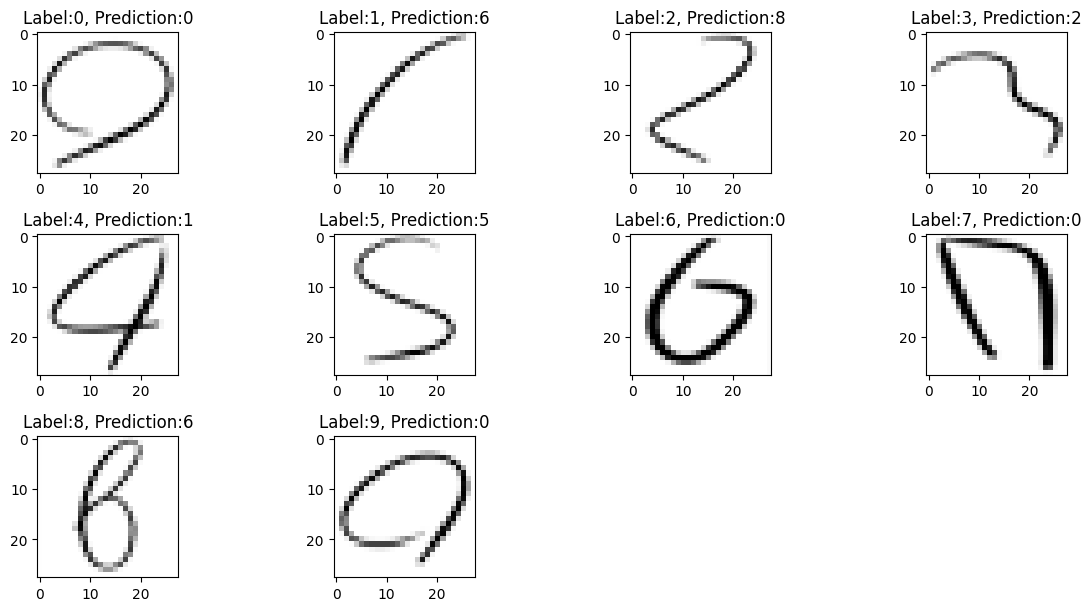

In [24]:
import numpy as np
from PIL import Image

# 이미지 배열 초기화
image_array = []

# 0부터 9까지의 이미지를 가져와서 전처리
for i in range(10):
    # 이미지 불러오기
    image = Image.open('./data4/' + str(i) + '.png')

    # 이미지를 흑백으로 변환
    image = image.convert('L')

    # 이미지 크기를 28x28로 조정
    image = image.resize((28, 28))

    # 이미지 반전
    image = np.array(image)
    image = np.invert(image)

    # 이미지 배열에 추가
    image_array.append(image)

    # 이미지 배열의 차원을 (28, 28, 1)로 조정
    image_array[i] = image_array[i].reshape((28, 28, 1))

# 이미지 배열을 numpy 배열로 변환
image_array_np = np.array(image_array)

# 모델을 사용하여 예측
predicted_result_juno = model.predict(image_array_np)

# 예측 결과에서 가장 높은 값을 가지는 인덱스를 예측 레이블로 설정
predicted_labels_juno = np.argmax(predicted_result_juno, axis=1)

# 예측 결과 시각화
plt.figure(figsize=(12, 8))

count = 0
for i in range(10):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(image_array_np[i].reshape(28, 28),
               cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(i) + ", Prediction:" + str(predicted_labels_juno[i])
    plt.title(tmp)

plt.tight_layout()
plt.show()


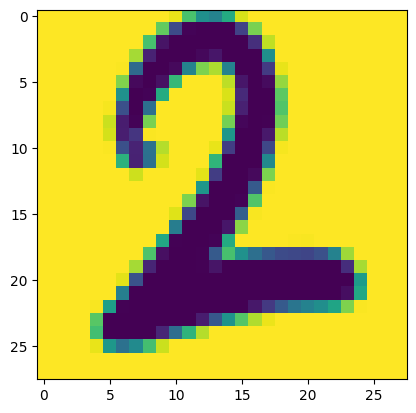

In [18]:
# image = Image.open('./data/' + str(i) + '.png')
image = Image.open('./data2/' + '2' + '.png')
image = image.convert('L')
image = image.resize((28, 28))
plt.imshow(image)